# Practice 2

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [61]:
np.random.seed(42)

## Step 1&2

In [62]:
def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

In [63]:
# Generate synthetic data
true_a = 2.0
true_b = 1.0
true_c = 0.5

sigma0 = 3.0

# Generate data
n_data = 10
n_sets = 1000

x = np.linspace(-5, 5, n_data)

## Step 3

In [64]:
all_data    = []
fit_results = []
chi2_values = []

In [65]:
for i in range(n_sets):
    # Generate synthetic data with noise
    y = parabolic(x, true_a, true_b, true_c) + np.random.normal(0, sigma0, size=x.shape)
    all_data.append(y)
    # Fit the data
    popt, pcov = curve_fit(parabolic, x, y)
    
    # Calculate chi-squared
    residuals = y - parabolic(x, *popt)
    chi2_value = np.sum((residuals / sigma0)**2)
    
    fit_results.append(popt)
    chi2_values.append(chi2_value)

In [66]:
all_data = np.array(all_data)
fit_results = np.array(fit_results)
chi2_values = np.array(chi2_values)

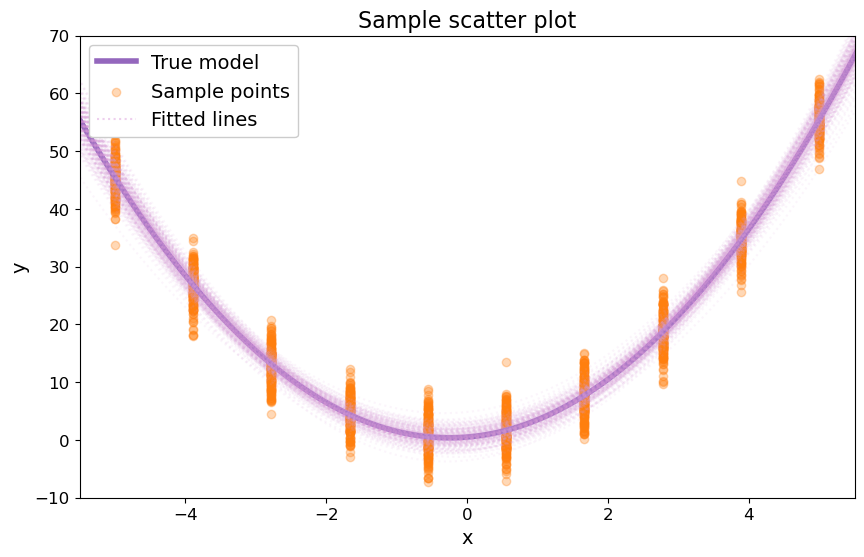

In [67]:
# Display the results
plt.figure(figsize=(10, 6))

x_plot = np.linspace(-8, 8, 500)
plt.plot(x_plot, parabolic(x_plot, true_a, true_b, true_c), color='C4', label='True model', 
         linewidth=4, linestyle='-')

sampled_sets = np.random.choice(n_sets, 200, replace=False)
for i in sampled_sets:
    plt.scatter(x, all_data[i, :], color='C1', alpha=0.3)
    plt.plot(x_plot, parabolic(x_plot, *fit_results[i]), color='plum', alpha=0.1, 
             linewidth=1.5, linestyle=':')

plt.scatter([], [], color='C1', alpha=0.3, label='Sample points')
plt.plot([], [], color='plum', alpha=0.5, linewidth=1.5, label='Fitted lines', linestyle=':')

plt.title('Sample scatter plot', fontsize=16)
plt.xlim(-5.5, 5.5)
plt.ylim(-10, 70)
plt.xlabel('x', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(fontsize=14, loc='upper left', framealpha=1)
plt.savefig("output2_1.pdf", transparent=True)
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/var/folders/43/jyz_5vx92ls0wqy_1gc8b1nr0000gn/T/ipykernel_66466/2579739031.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}',


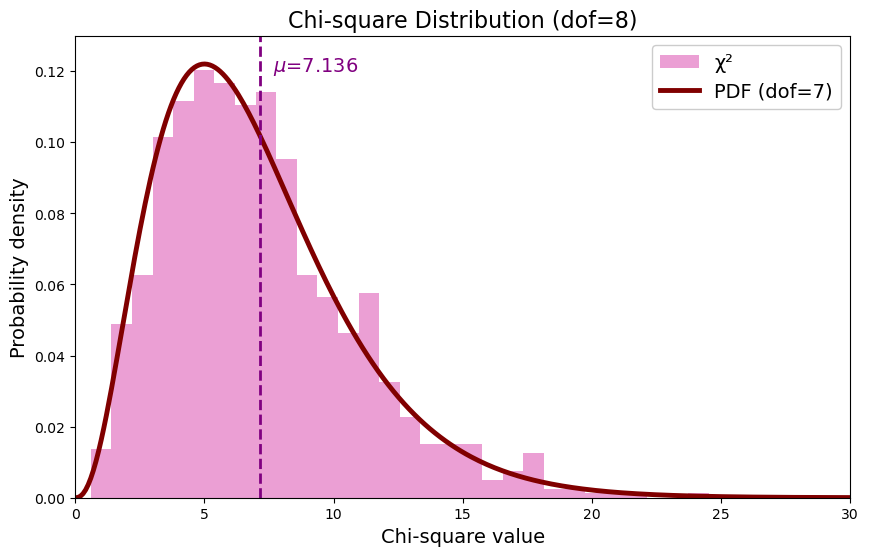

In [68]:
#chi square直方圖
plt.figure(figsize=(10, 6))

plt.hist(chi2_values, bins=30, density=True, alpha=0.7, label='χ²', color='C6', 
         histtype='stepfilled')

x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=7), linestyle='-', color='maroon', label='PDF (dof=7)', 
         linewidth=3.5)
plt.plot([np.mean(chi2_values), np.mean(chi2_values)], [0, 0.2], linestyle='--', 
         color="purple", lw=2, label='__no_legend__')
plt.text(np.mean(chi2_values)+0.5, 0.12, f'$\mu$={np.mean(chi2_values):.3f}', 
         fontsize=14, color='purple')

plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.13)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output2_2.pdf", transparent=True)
plt.show()

In [69]:
mean_y = np.mean(all_data, axis=0)
parms_mean, _ = curve_fit(parabolic, x, y)
chisq_mean = np.sum((mean_y - parabolic(x, *parms_mean))**2 / sigma0**2)
p_mean = 1 - chi2.cdf(chisq_mean, df=7)

print('chi-square of mean(y)= ', chisq_mean)
print('p-value of mean(y)= ', p_mean)

chi-square of mean(y)=  2.2997863533001834
p-value of mean(y)=  0.9414044462245248


In [70]:
# # Calculate the mean chi-squared value
# mean_chi2 = np.mean(chi2_values)

# # Calculate the p-value
# p_value = 1 - chi2.cdf(mean_chi2, df=7)

# # Mark the p-value on the plot
# plt.figure(figsize=(10, 6))

# plt.hist(chi2_values, bins=30, density=True, alpha=0.7, label='χ²', color='C6', 
#          histtype='stepfilled')

# x_chi = np.linspace(0, 50, 500)
# plt.plot(x_chi, chi2.pdf(x_chi, df=7), linestyle='-', color='maroon', label='PDF (dof=7)', 
#          linewidth=3.5)
# plt.plot([mean_chi2, mean_chi2], [0, 0.2], linestyle='--', color="purple", lw=2, label='__no_legend__')
# plt.text(mean_chi2 + 0.5, 0.11, f'$\mu$={mean_chi2:.3f}\n$p$={p_value:.3f}', fontsize=14, color='purple')

# plt.title('Chi-square Distribution (dof=8)', fontsize=16)
# plt.xlabel('Chi-square value', fontsize=14)
# plt.ylabel('Probability density', fontsize=14)
# plt.xlim(left=0, right=30)
# plt.ylim(bottom=0, top=0.13)
# plt.legend(fontsize=14, framealpha=1)
# plt.savefig("output2_3.pdf", transparent=True)
# plt.show()

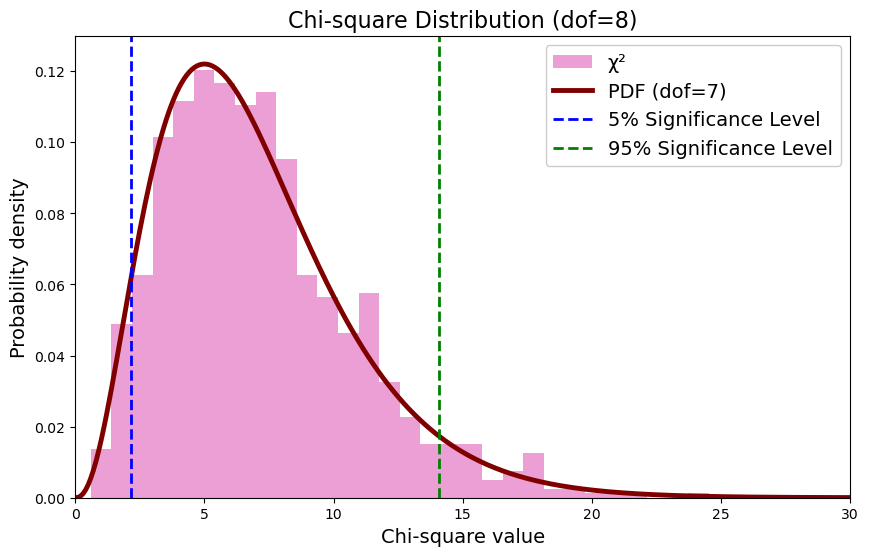

In [71]:
# Calculate the 5% and 95% significance levels
significance_5 = chi2.ppf(0.05, df=7)
significance_95 = chi2.ppf(0.95, df=7)

# Plot the histogram with significance levels
plt.figure(figsize=(10, 6))

plt.hist(chi2_values, bins=30, density=True, alpha=0.7, label='χ²', color='C6', histtype='stepfilled')

x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=7), linestyle='-', color='maroon', label='PDF (dof=7)', linewidth=3.5)

# Mark the mean chi-square value
# plt.plot([mean_chi2, mean_chi2], [0, 0.2], linestyle='--', color="purple", lw=2, label='Mean χ²')
# plt.text(mean_chi2 + 0.5, 0.11, f'$\mu$={mean_chi2:.3f}\n$p$={p_value:.3f}', fontsize=14, color='purple')

# Mark the 5% and 95% significance levels
plt.axvline(significance_5, color='blue', linestyle='--', linewidth=2, label='5% Significance Level')
plt.axvline(significance_95, color='green', linestyle='--', linewidth=2, label='95% Significance Level')

plt.title('Chi-square Distribution (dof=8)', fontsize=16)
plt.xlabel('Chi-square value', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.xlim(left=0, right=30)
plt.ylim(bottom=0, top=0.13)
plt.legend(fontsize=14, framealpha=1)
plt.savefig("output2_4.pdf", transparent=True)
plt.show()